# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response["coord"]["lat"]
        city_lng = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_wind = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | peniche
Processing Record 3 of Set 1 | outjo
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | morehead city
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | challapata
Processing Record 10 of Set 1 | winnemucca
Processing Record 11 of Set 1 | cromer
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | padang mat sirat
City not found. Skipping...
Processing Record 20 of Set 1 | kultali
City not found. Skipping...
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
#pass list of dictionaries collected through API responses into a data frame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,peniche,39.3558,-9.3811,19.49,76,100,1.96,PT,1707064554
1,outjo,-20.1167,16.1500,22.60,74,93,3.32,NA,1707064554
2,yellowknife,62.4560,-114.3525,-23.17,84,40,2.06,CA,1707064244
3,morehead city,34.7229,-76.7260,11.00,62,0,4.12,US,1707064554
4,college,64.8569,-147.8028,-30.31,71,40,0.00,US,1707064259


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,peniche,39.3558,-9.3811,19.49,76,100,1.96,PT,1707064554
1,outjo,-20.1167,16.1500,22.60,74,93,3.32,NaN,1707064554
2,yellowknife,62.4560,-114.3525,-23.17,84,40,2.06,CA,1707064244
3,morehead city,34.7229,-76.7260,11.00,62,0,4.12,US,1707064554
4,college,64.8569,-147.8028,-30.31,71,40,0.00,US,1707064259


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

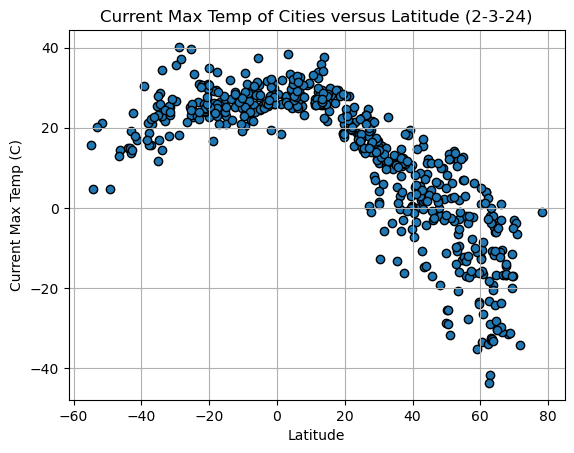

<Figure size 640x480 with 0 Axes>

In [9]:
#create a function to easily repeat for each dependent variable
#include units as a variable to include on plot
def weather_scatter(y_variable, units):
    # Build scatter plot for latitude vs. temperature
    x_axis = city_data_df["Lat"]
    y_axis = city_data_df[y_variable]

    #add grid and black edgecolor around each point to help data stand out
    plt.scatter(x_axis, y_axis, edgecolors = "black")
    plt.grid()

    # Incorporate the other graph properties
    plt.title(f"Current {y_variable} of Cities versus Latitude (2-3-24)")
    plt.xlabel("Latitude")
    plt.ylabel(f"Current {y_variable} ({units})")

    #Show the plot
    plt.show()

weather_scatter("Max Temp", "C")
#Save the figure
plt.savefig("../output_data/Fig1.png")

#### Latitude Vs. Humidity

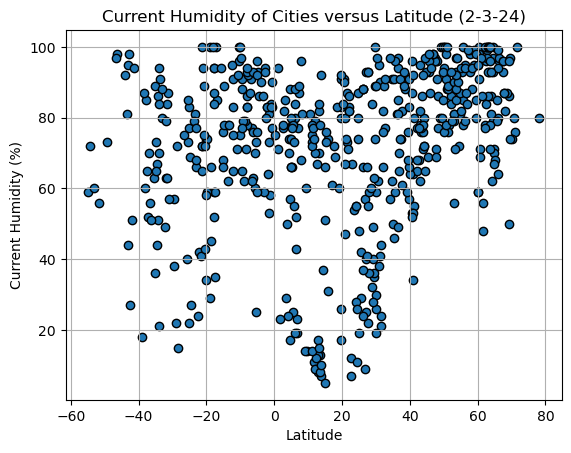

<Figure size 640x480 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
weather_scatter("Humidity", "%")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

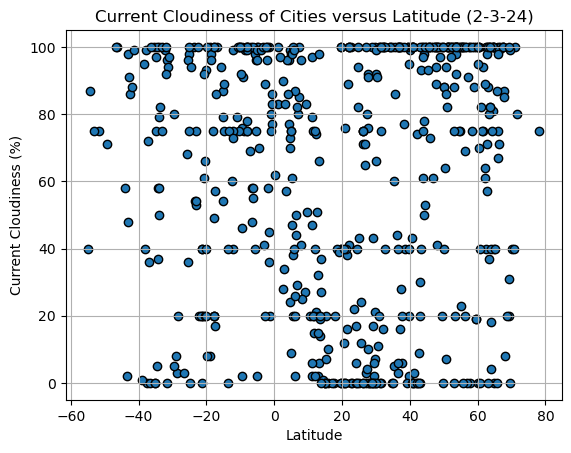

<Figure size 640x480 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
weather_scatter("Cloudiness", "%")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

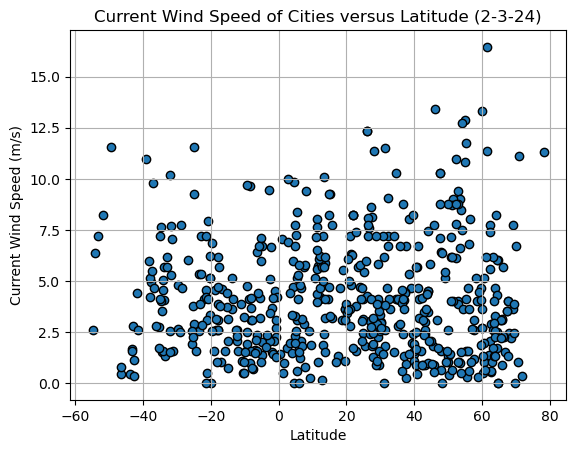

<Figure size 640x480 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
weather_scatter("Wind Speed", "m/s")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_regress_plot(hemi_specific_df, y_variable, units):
    #plotting variable are Lat versus the dependent variable, customizable by hemisphere
    x_values = hemi_specific_df["Lat"]
    y_values = hemi_specific_df[y_variable]
    #set up linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    #add information to plot (use same axis titles from scatter plots above)
    plt.annotate(line_eq, xy=((min(x_values + 10), (min(y_values) + 10))), fontsize = 10, color ="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"Current {y_variable} ({units})")

    #display information
    print(f'The r-value is: {rvalue}')
    plt.show()


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,peniche,39.3558,-9.3811,19.49,76,100,1.96,PT,1707064554
2,yellowknife,62.4560,-114.3525,-23.17,84,40,2.06,CA,1707064244
3,morehead city,34.7229,-76.7260,11.00,62,0,4.12,US,1707064554
4,college,64.8569,-147.8028,-30.31,71,40,0.00,US,1707064259
8,winnemucca,40.9730,-117.7357,0.03,64,100,5.66,US,1707064281


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,outjo,-20.1167,16.1500,22.60,74,93,3.32,NaN,1707064554
5,hermanus,-34.4187,19.2345,24.89,86,58,1.50,ZA,1707064268
6,waitangi,-43.9535,-176.5597,14.90,92,58,0.45,NZ,1707064246
7,challapata,-18.9000,-66.7667,16.68,29,8,4.57,BO,1707064554
11,adamstown,-25.0660,-130.1015,24.79,77,98,2.87,PN,1707064246


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8643821192948608


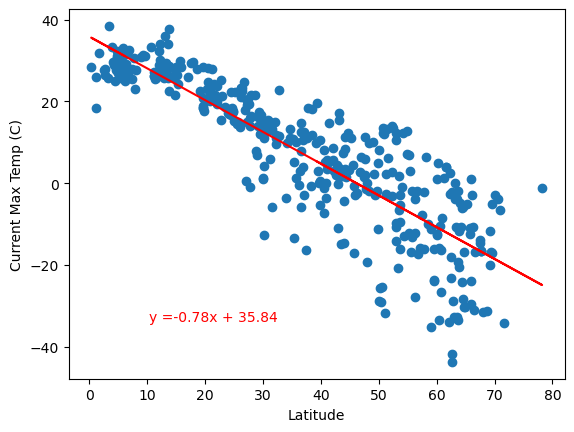

In [16]:
# Linear regression on Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Max Temp", "C")

The r-value is: 0.5129348625074283


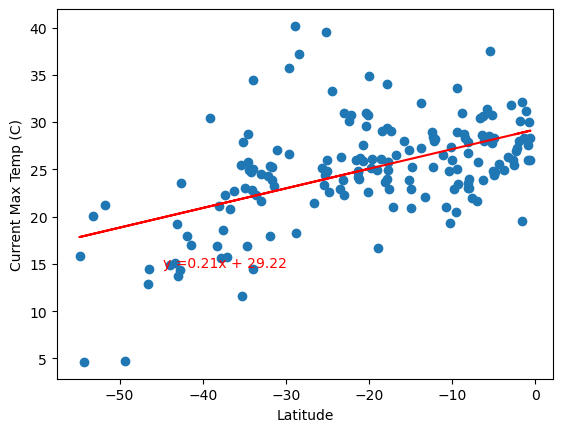

In [17]:
# Linear regression on Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Max Temp", "C")

**Discussion about the linear relationship:** The linear relationship shows that the maximum temperature increases the closer to the equator that you get (where latitude = 0). A very strong negative relationship is seen between temperature and latitude in the northern hemisphere (r = -0.86). A less strong, but still present relationship exists between temperature and latitude in the southern hemisphere (r = 0.51). It should also be noted that the range of both latitudes (0 to 80) and temperatures (approx. -40 to 40) is wider in the northern hemisphere than in the southern hemisphere (latitude range: -50 to 0, temp range: approx. 5 to 40). This could possibly be due to a greater population density therefore more cities to be chosen from at a higher latitude.  

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.47865332463862287


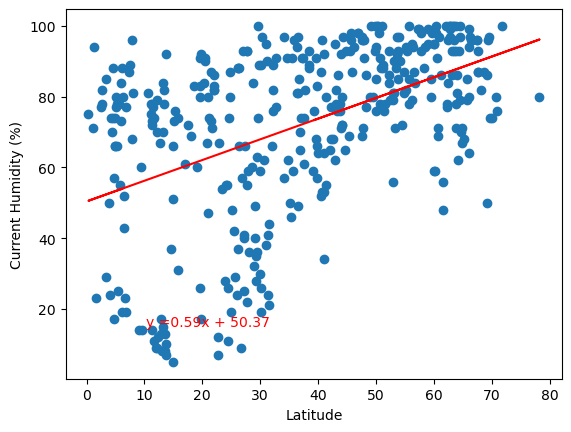

In [18]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Humidity", "%")

The r-value is: 0.24325024231152892


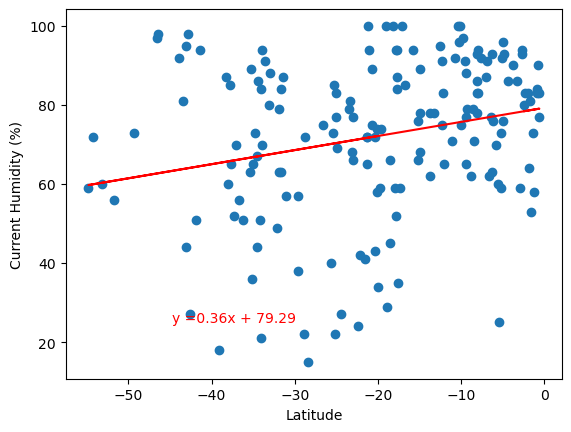

In [19]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Humidity", "%")

**Discussion about the linear relationship:** There is a slight relationship between latitude and humidity in both the northern hemisphere (r = 0.48) and the southern hemisphere (0.24). As seen between temperature and latitude, the relationship is stronger in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2649320904438891


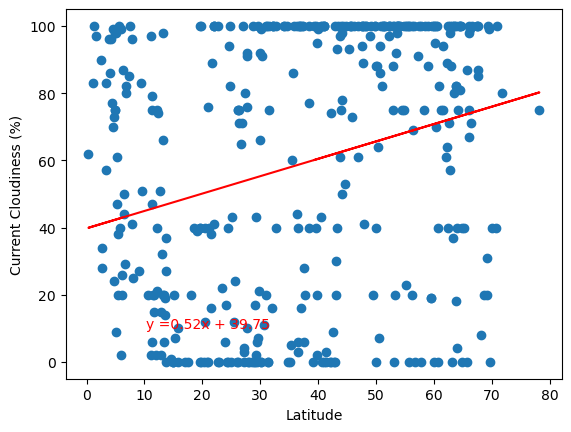

In [20]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Cloudiness", "%")

The r-value is: 0.12863981586025164


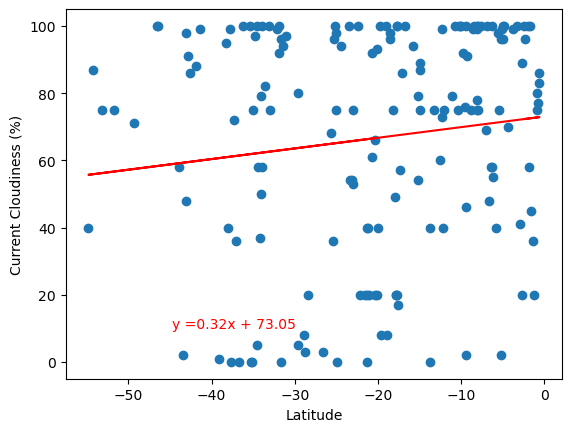

In [21]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Cloudiness", "%")

**Discussion about the linear relationship:** The relationship between latitude and cloudiness is positive for both the northern (slope = 0.52) and southern (slope = 0.32) hemisphere, but is a very weak relationship (northern hemi. r = 0.26, southern hemi. r = 0.13).

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.05125070609543848


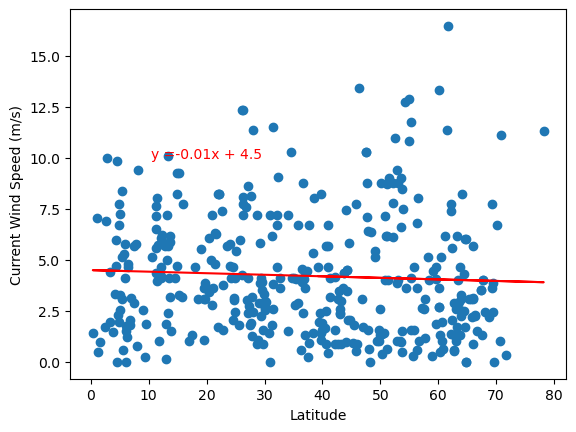

In [22]:
# Northern Hemisphere
lin_regress_plot(northern_hemi_df, "Wind Speed", "m/s")

The r-value is: -0.19747704486889744


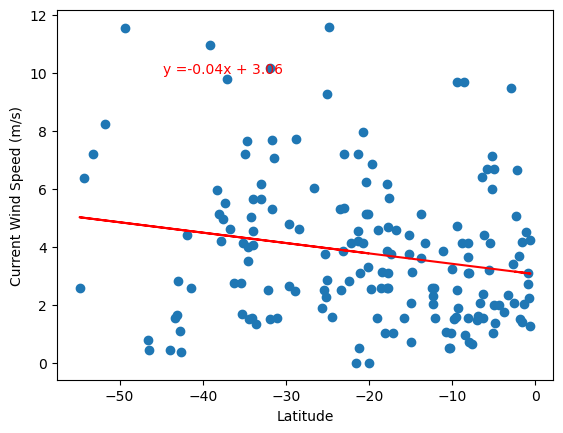

In [23]:
# Southern Hemisphere
lin_regress_plot(southern_hemi_df, "Wind Speed", "m/s")

**Discussion about the linear relationship:** There appears to be little to no relationship between latitude and wind speed in either hemisphere, with very low r values for both (norhtern hemi. r = -0.05, southern hemi. r = -0.19).